In [58]:
# From following from the book
# getting needed modules
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# config for modules
pd.set_option('display.precision', 2) # adjust as needed
pd.set_option('display.max_columns',11) # adjust as needed
pd.set_option('display.width',None) # don't touch

sns.set(font_scale=2)
sns.set_style('whitegrid')

#also enable support for graphs
%matplotlib inline

In [59]:
# getting data
ds = sk.datasets.load_diabetes()

In [60]:
# view the datasets DESCR attribute
print(ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [61]:
# View number of samples (rows) and features (rows)
print(ds.data.shape)

(442, 10)


In [62]:
# View number of target samples
print(ds.target.shape)


(442,)


In [63]:
# We can also view the column names
print(ds.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [64]:
# Now we create a Dataframe with the data, target, and feature_names arrays
df = pd.DataFrame(ds.data,columns=ds.feature_names) # Create dataframe with data

# add the target variablee onto it
df['DiseaseProgression'] = pd.Series(ds.target)

In [65]:
# lets view some of the data with the head function
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,3.81e-02,0.05,0.06,2.19e-02,-4.42e-02,-0.03,-4.34e-02,-2.59e-03,1.99e-02,-1.76e-02,151.0
1,-1.88e-03,-0.04,-0.05,-2.63e-02,-8.45e-03,-0.02,7.44e-02,-3.95e-02,-6.83e-02,-9.22e-02,75.0
2,8.53e-02,0.05,0.04,-5.67e-03,-4.56e-02,-0.03,-3.24e-02,-2.59e-03,2.86e-03,-2.59e-02,141.0
3,-8.91e-02,-0.04,-0.01,-3.67e-02,1.22e-02,0.02,-3.60e-02,3.43e-02,2.27e-02,-9.36e-03,206.0
4,5.38e-03,-0.04,-0.04,2.19e-02,3.93e-03,0.02,8.14e-03,-2.59e-03,-3.20e-02,-4.66e-02,135.0


In [66]:
# let's view summary stats of the dataframe
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,4.42e+02,442.00
mean,-2.51e-19,1.23e-17,-2.25e-16,-4.80e-17,-1.38e-17,3.92e-17,-5.78e-18,-9.04e-18,9.29e-17,1.13e-17,152.13
std,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,4.76e-02,77.09
min,-1.07e-01,-4.46e-02,-9.03e-02,-1.12e-01,-1.27e-01,-1.16e-01,-1.02e-01,-7.64e-02,-1.26e-01,-1.38e-01,25.00
25%,-3.73e-02,-4.46e-02,-3.42e-02,-3.67e-02,-3.42e-02,-3.04e-02,-3.51e-02,-3.95e-02,-3.32e-02,-3.32e-02,87.00
50%,5.38e-03,-4.46e-02,-7.28e-03,-5.67e-03,-4.32e-03,-3.82e-03,-6.58e-03,-2.59e-03,-1.95e-03,-1.08e-03,140.50
75%,3.81e-02,5.07e-02,3.12e-02,3.56e-02,2.84e-02,2.98e-02,2.93e-02,3.43e-02,3.24e-02,2.79e-02,211.50
max,1.11e-01,5.07e-02,1.71e-01,1.32e-01,1.54e-01,1.99e-01,1.81e-01,1.85e-01,1.34e-01,1.36e-01,346.00


In [67]:
# We are going to visualize the data (target variable in respect to features)
# First, we need to select some data from the dataframe
sample_df = df.sample(frac=0.1,random_state=42) # get 10% of the data and seed the random selector with the meaning of life

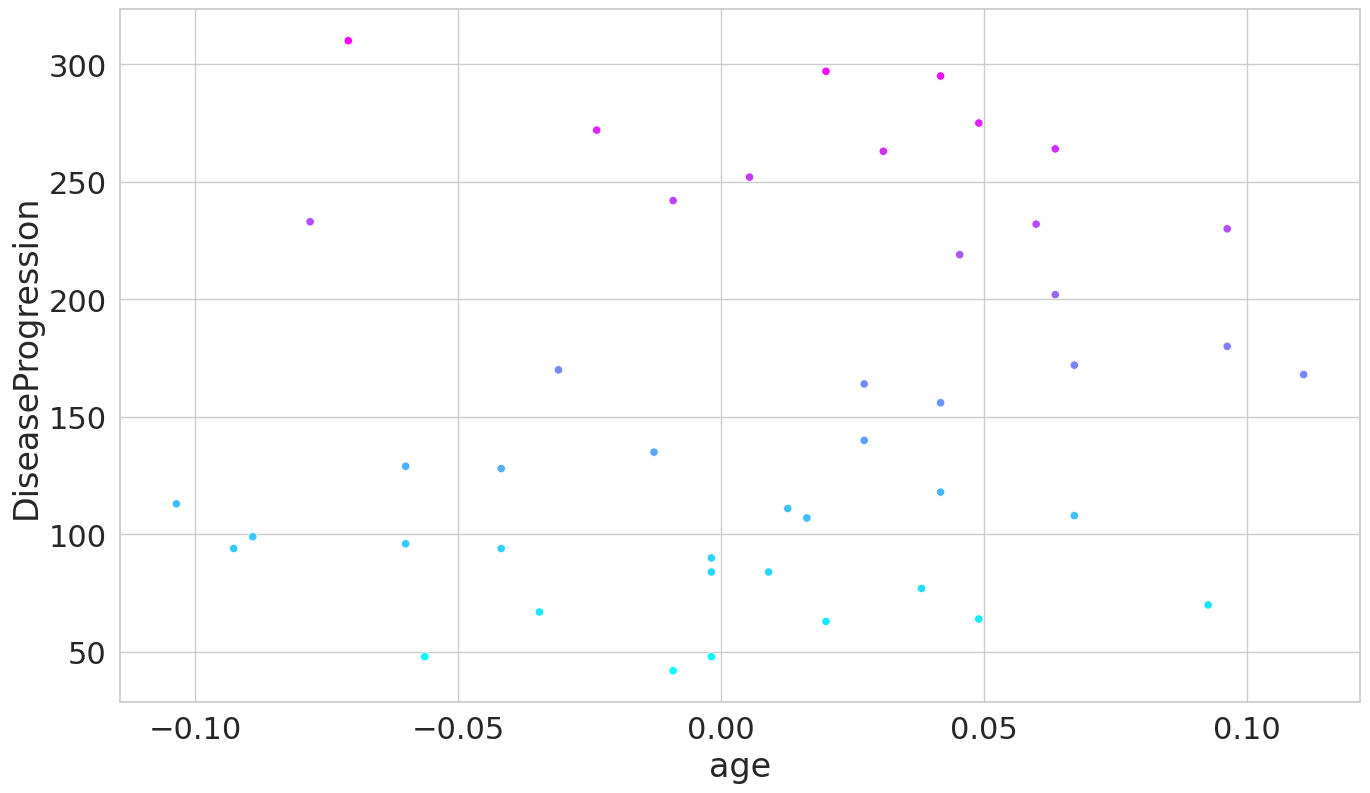

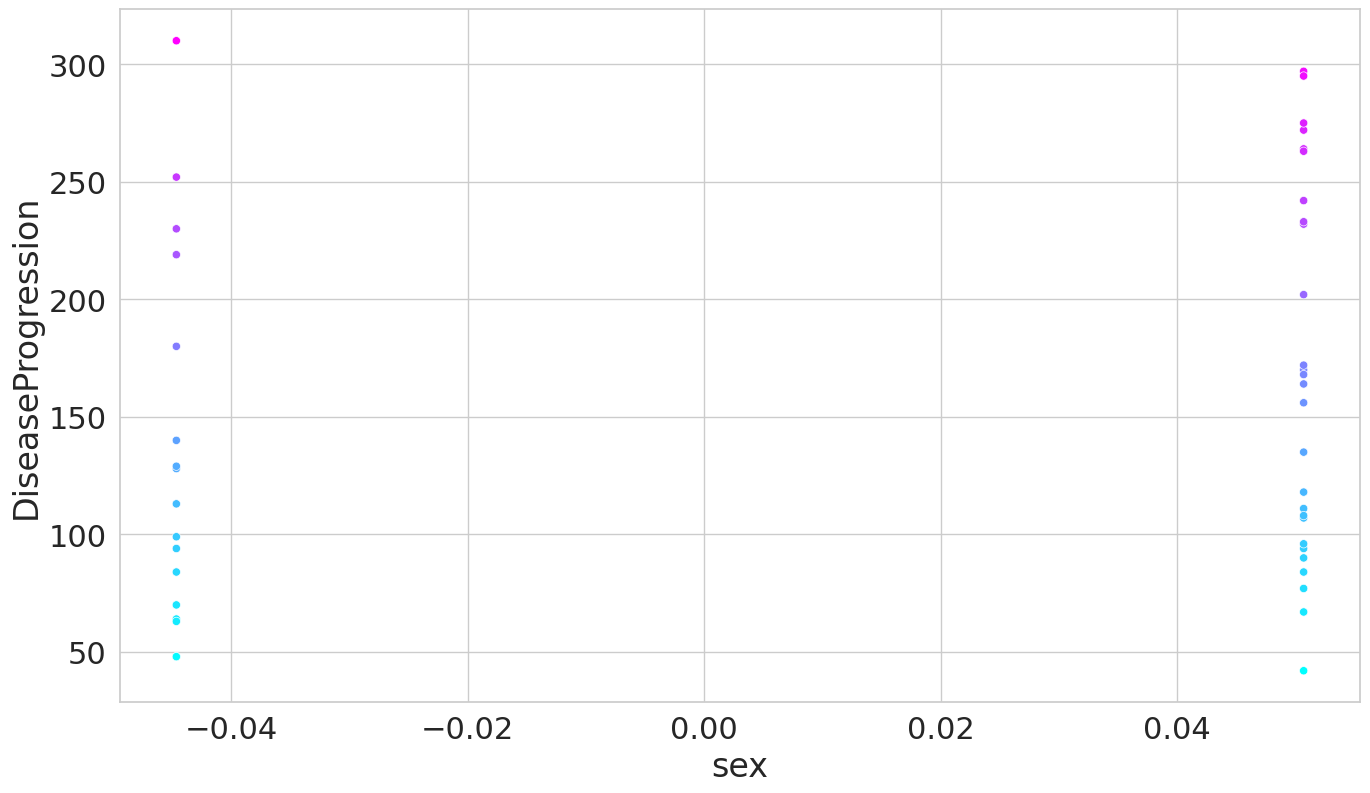

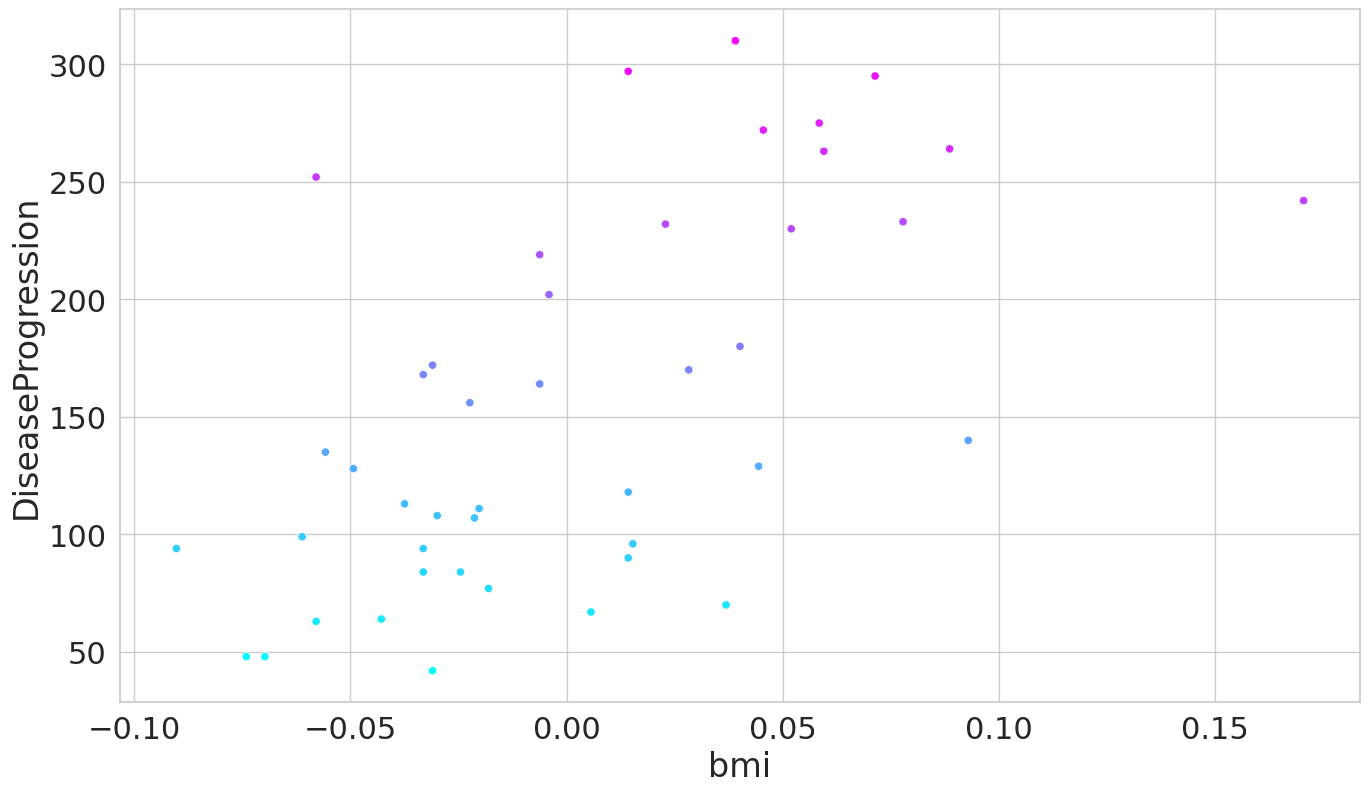

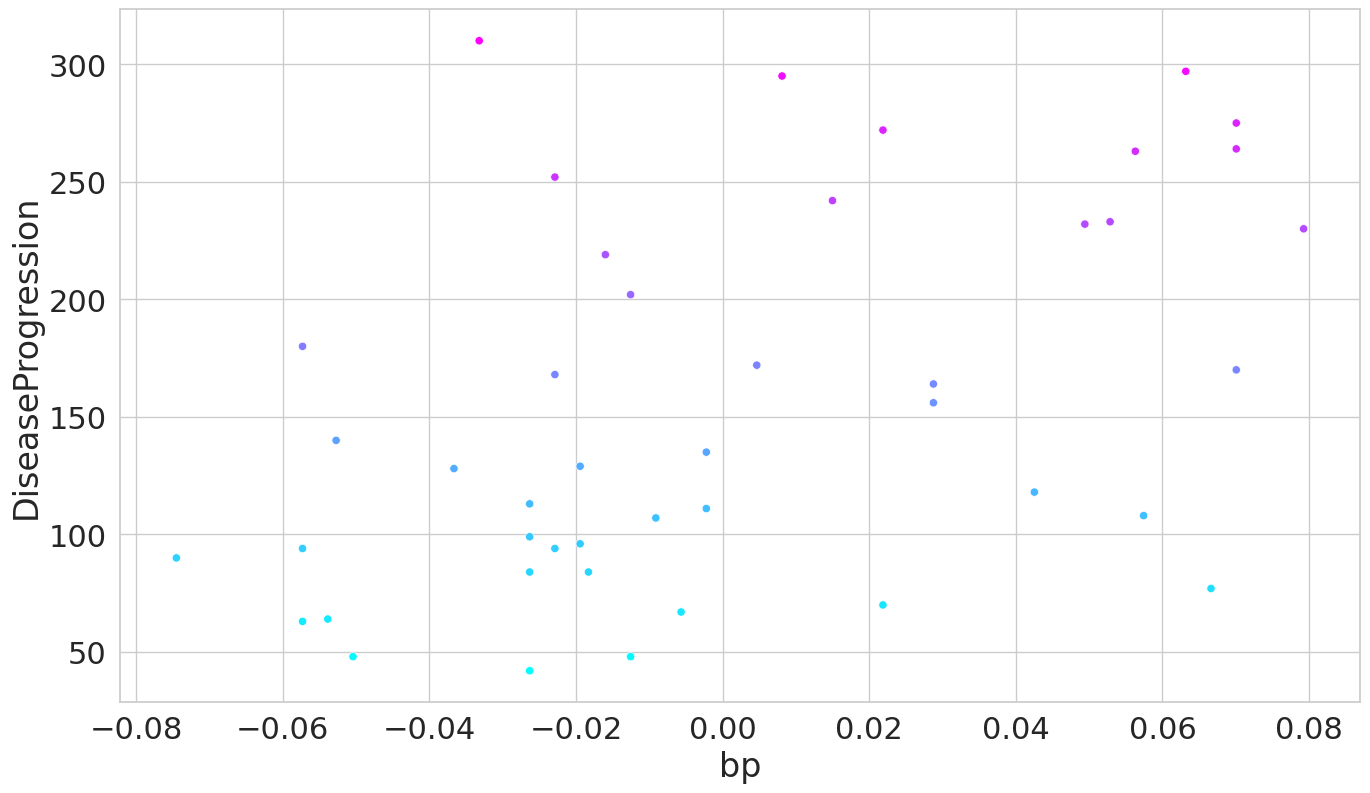

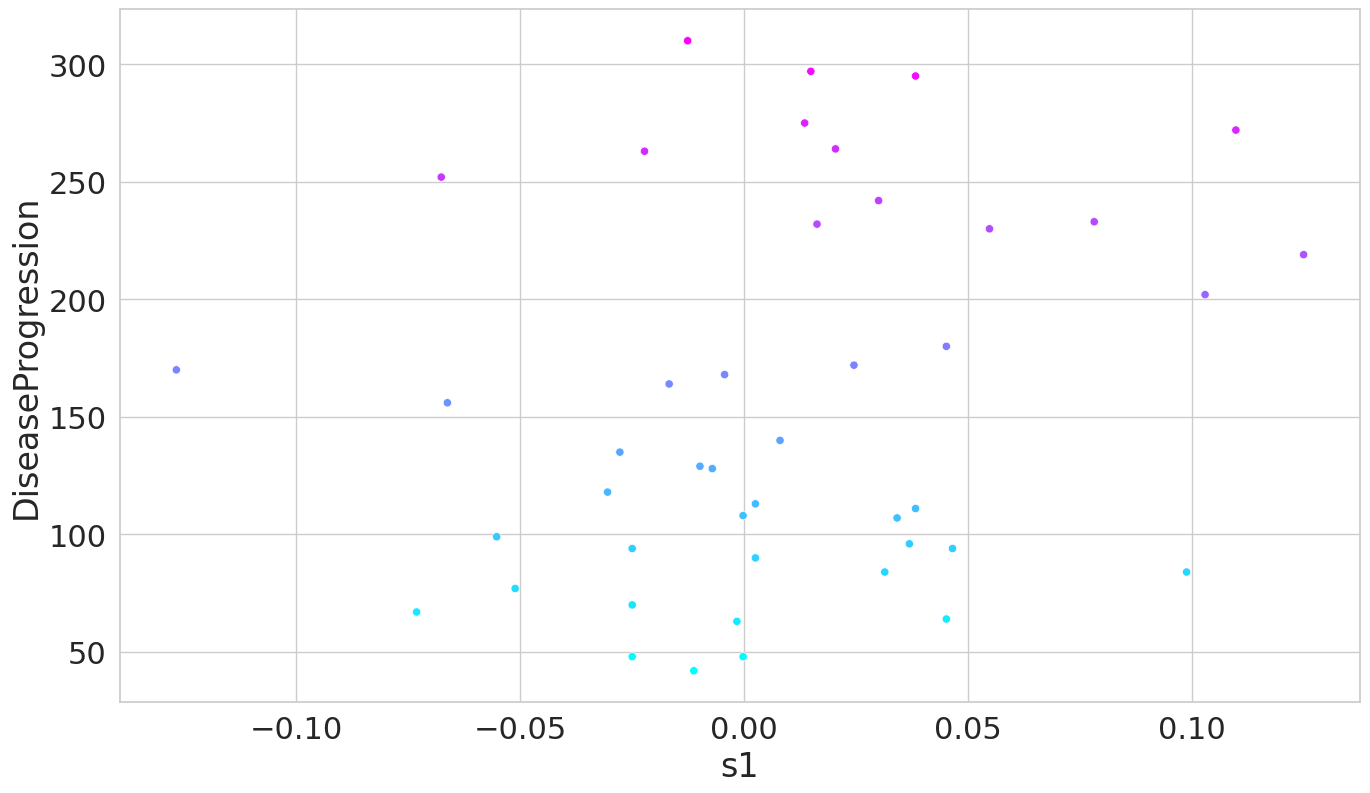

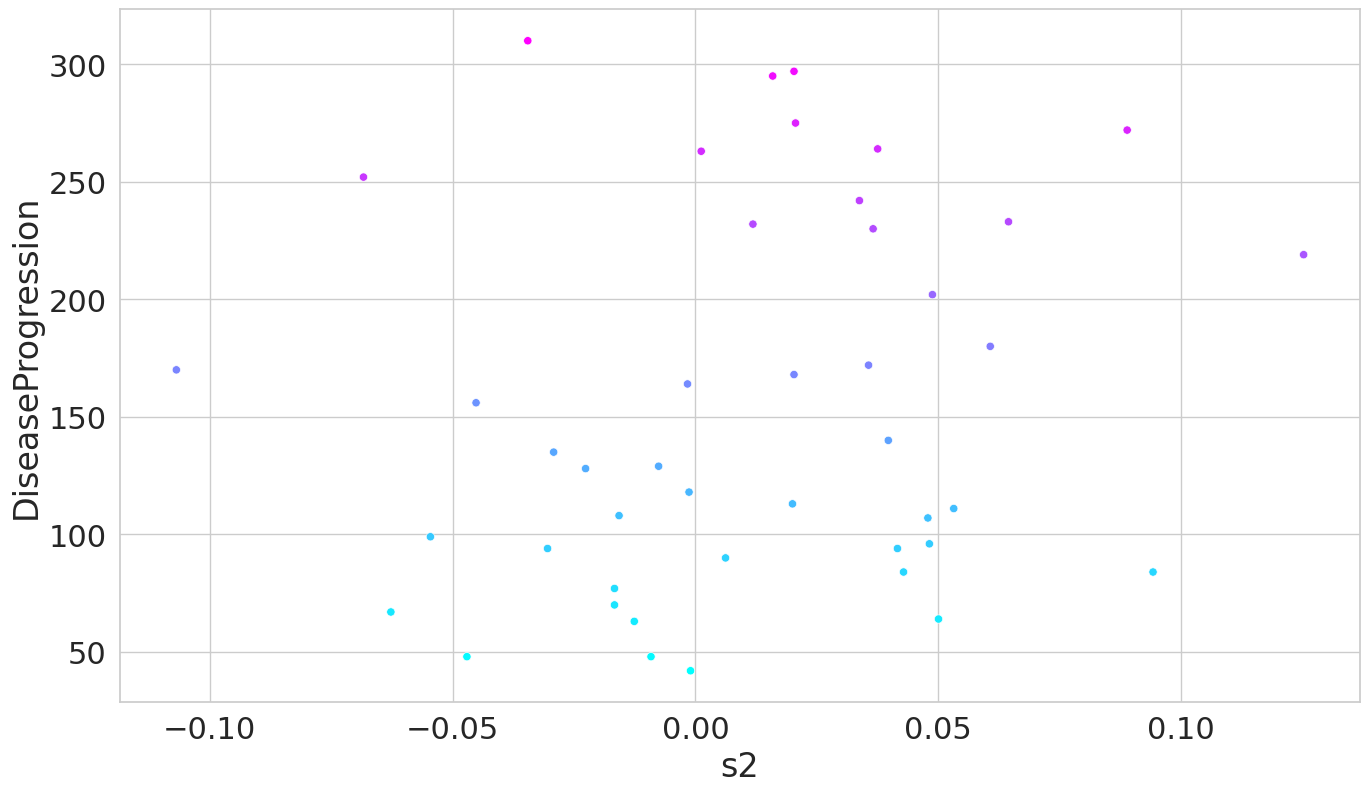

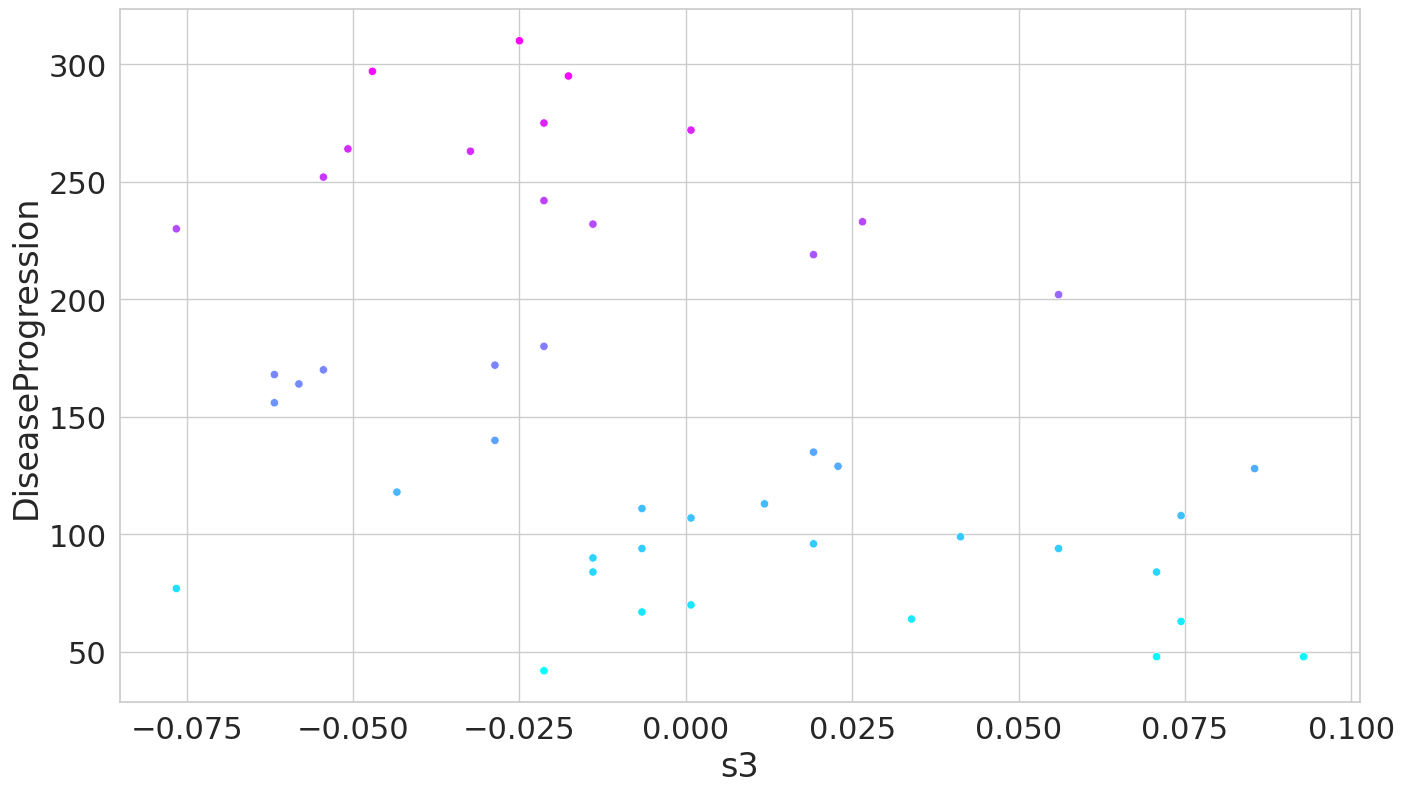

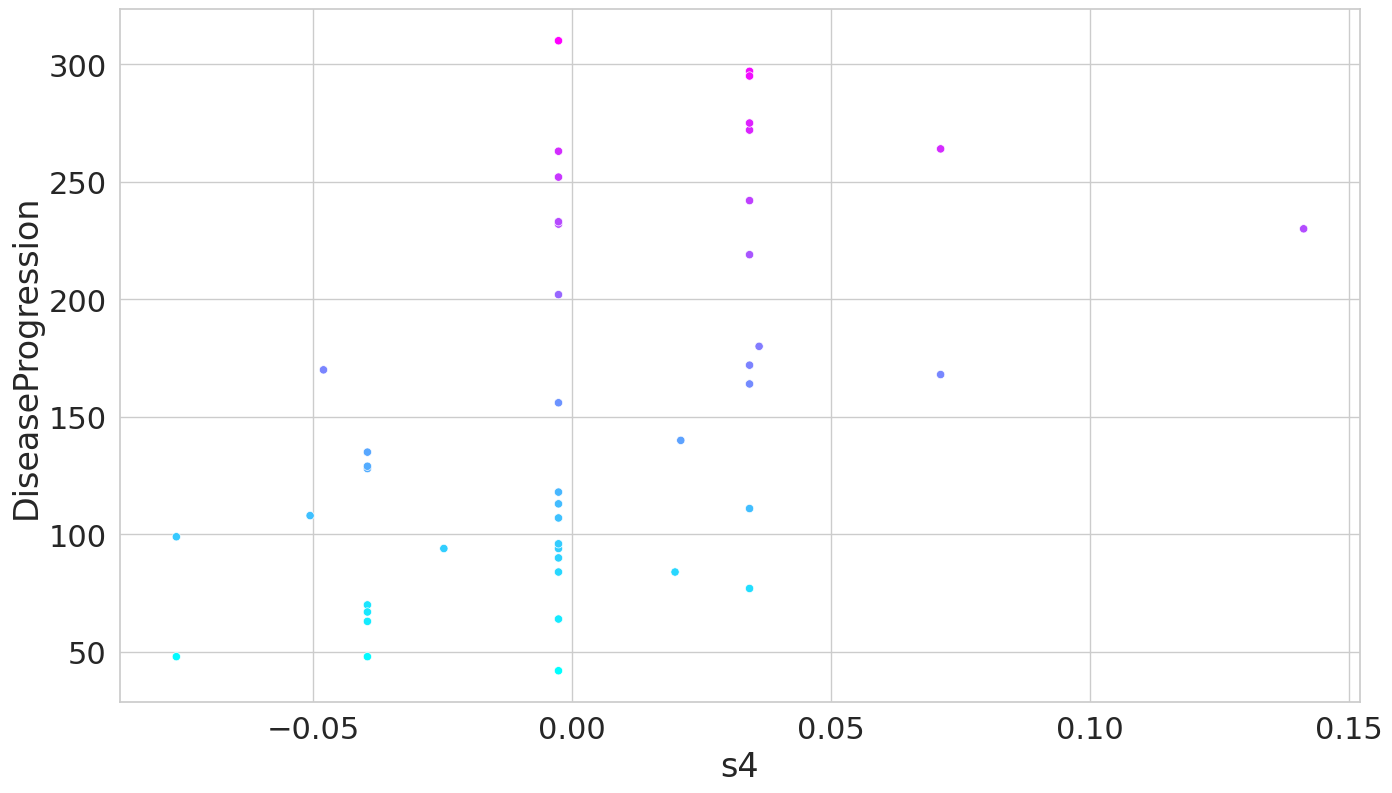

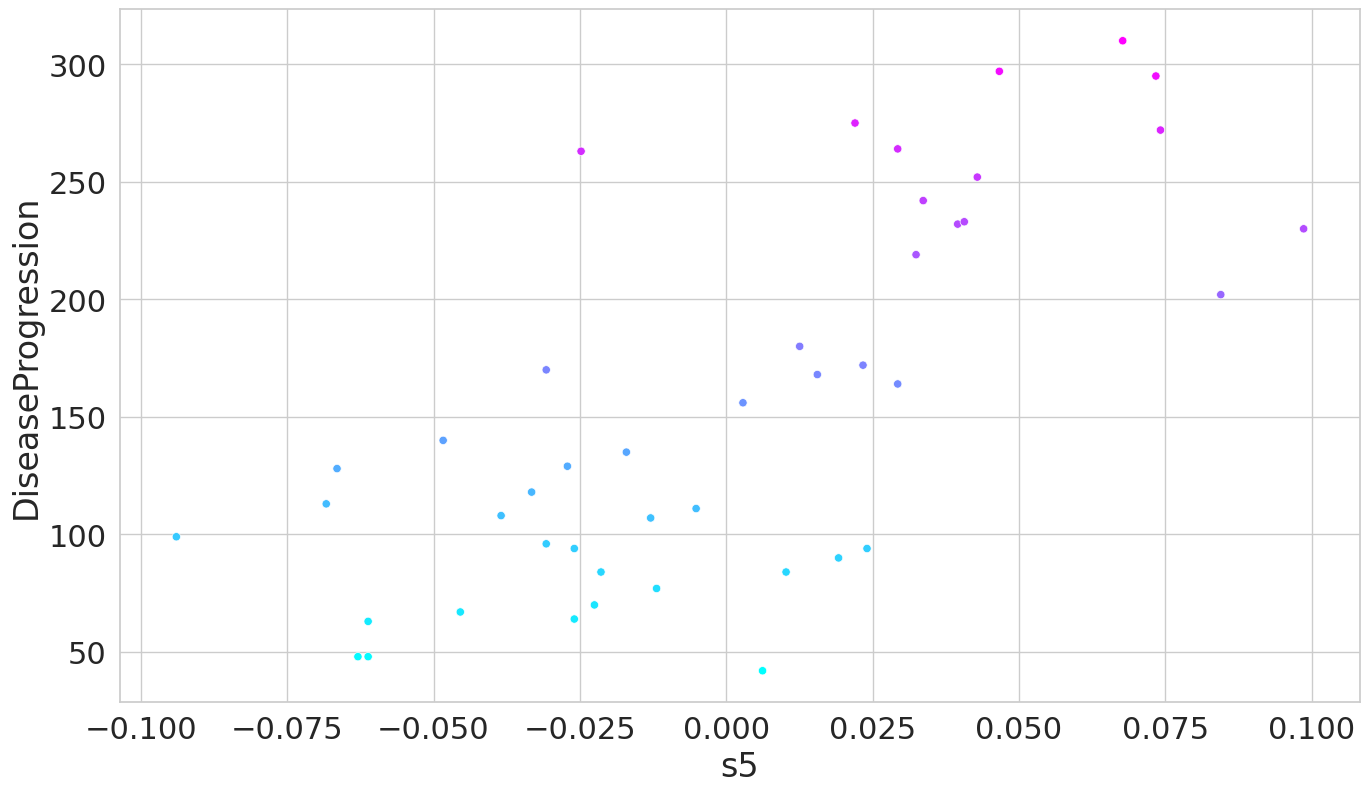

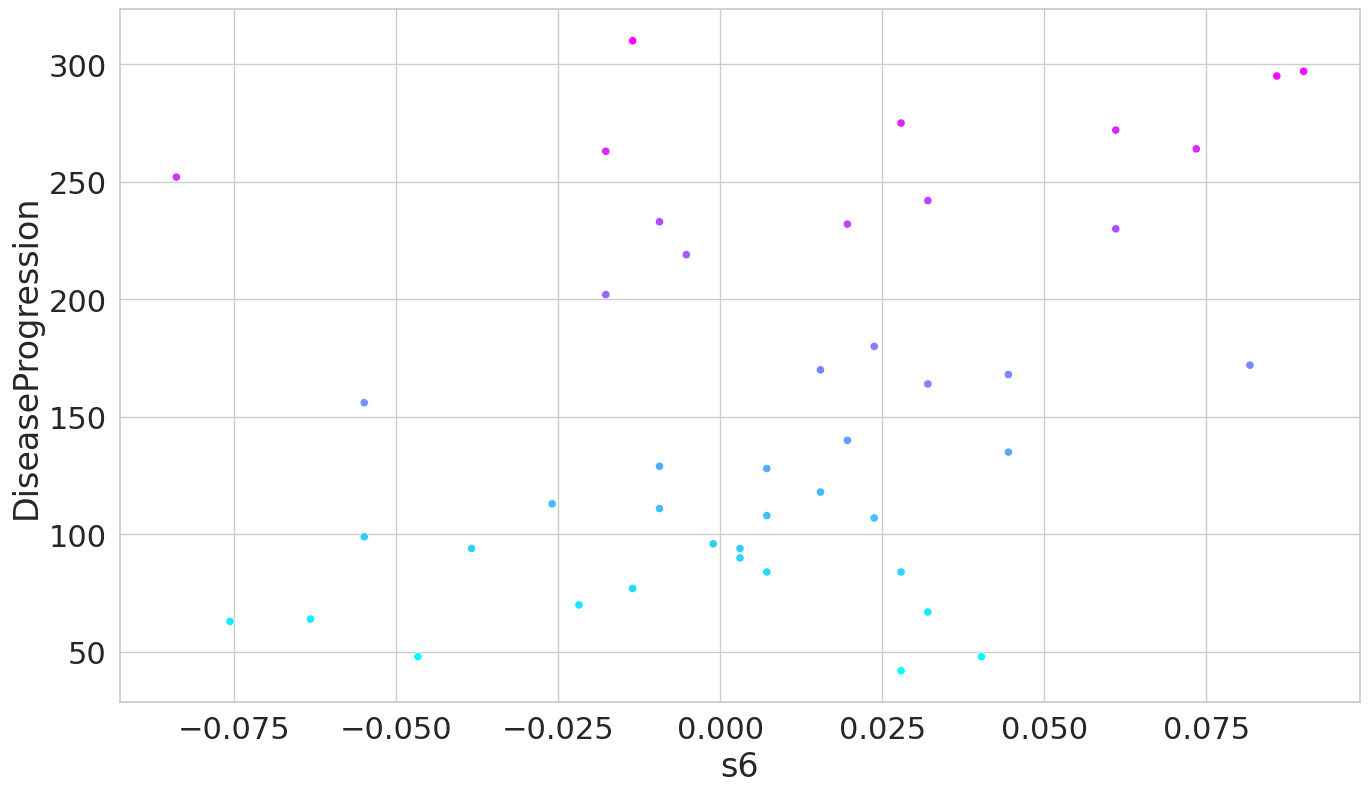

In [68]:
# Now, let us see the data
for feature in ds.feature_names:
  plt.figure(figsize=(16,9))
  sns.scatterplot(data=sample_df,x=feature,y='DiseaseProgression',hue='DiseaseProgression',palette='cool',legend=False)

In [69]:
# Now we are going to split the data into training and testing groups
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(ds.data,ds.target,random_state=11)

# Also view the size of the groups
print(x_train.shape)
print(x_test.shape)

(331, 10)
(111, 10)


In [70]:
# Now, using sci-kit learn, we make a lin. reg. est.
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X=x_train,y=y_train)
LinearRegression(copy_X=True,fit_intercept=True,n_jobs=None) # book mentions 'normalize' as a parameter, but this parameter has been removed from the function for some time


LinearRegression()

In [71]:
# Now we can output the data from the lin. reg. along with the feature value
for i,name in enumerate(ds.feature_names):
  print(f'{name:>10}:{lin_reg.coef_[i]}')

print(lin_reg.intercept_)

       age:-60.21981405677291
       sex:-266.45705232203574
       bmi:523.0634112596993
        bp:310.5134699670048
        s1:-336.1614738106944
        s2:137.3392923842451
        s3:-131.13923283453653
        s4:-1.1492348017315557
        s5:622.3286855688128
        s6:60.466457691682535
152.22822762230342


In [72]:
# Now, we test the model
predicted = lin_reg.predict(x_test)
expected = y_test

In [73]:
# Let's view the first 5 prediction and corresponding expected values
print(predicted[:5])
print(expected[:5])

[115.46474836  83.4585369  160.77727376 187.65710274  72.72122197]
[ 79.  55. 109. 178.  39.]


In [74]:
# We want to view the expected values vs. the predicted values in a more clear way
# make a dataframe with columns as the expected and predicted values
tdf = pd.DataFrame()
tdf['Expected']=pd.Series(expected)
tdf['Predicted']=pd.Series(predicted)

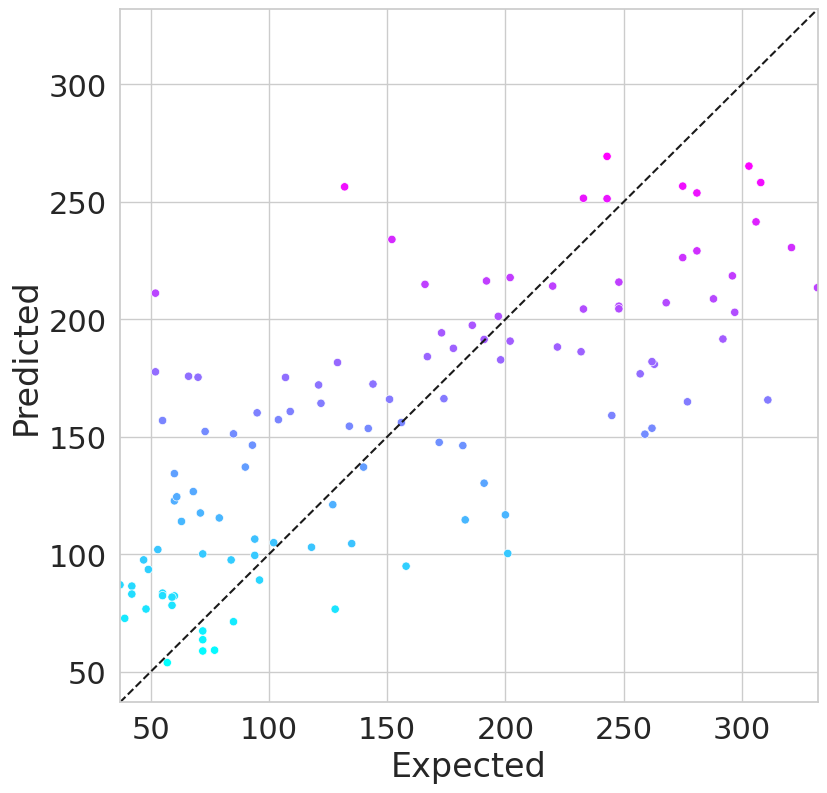

In [75]:
# Now we want to set up a scatterplot to view the data.
figure=plt.figure(figsize=(9,9))
axes=sns.scatterplot(data=tdf,x='Expected',y='Predicted',hue='Predicted',palette='cool',legend=False)

# set x and y axis to use same scale
start=min(expected.min(),predicted.min())
end=max(expected.max(),predicted.max())

axes.set_xlim(start,end)
axes.set_ylim(start,end)

# Then we plot a line of perfect predictions
line = plt.plot([start,end],[start,end],'k--')

In [76]:
# We view the r2 score of the data
from sklearn import metrics
metrics.r2_score(expected,predicted)

0.5322429620529407

In [77]:
# We can also view the mean squared error
metrics.mean_squared_error(expected,predicted)

3458.2307025173577

In [78]:
# We can also try other models to see if they fit better
from sklearn.linear_model import ElasticNet,Lasso,Ridge

estimators={'LinearRegression':lin_reg,'ElasticNet':ElasticNet(),'Lasso':Lasso(),'Ridge':Ridge()}

In [79]:
# and use them
from sklearn.model_selection import KFold, cross_val_score

for est_name,est_obj in estimators.items():
  kfold = KFold(n_splits=10,random_state=11,shuffle=True)
  scores=cross_val_score(estimator=est_obj,X=ds.data,y=ds.data,scoring='r2')
  print(f'{est_name:>16}:' + f' mean of r2 scores = {scores.mean():.3f}')

LinearRegression: mean of r2 scores = 1.000
      ElasticNet: mean of r2 scores = -0.031
           Lasso: mean of r2 scores = -0.031
           Ridge: mean of r2 scores = 0.761
